# Preliminaries

## Dataset

In this set of exercises we will use the same dataset as from [week 3](week_3.ipynb). 


As before, we provide the data already curated in the following two files:

`RNA_expression_curated.csv`: [148 cell lines , 238 genes]

`drug_response_curated.csv`: [148 cell lines , YM155 drug]

The curated data can be read as `pandas` `DataFrame` in the following way:

In [14]:
import pandas as pd

gene_expression = pd.read_csv("./data/RNA_expression_curated.csv", sep=',', header=0, index_col=0)
drug_response = pd.read_csv("./data/drug_response_curated.csv", sep=',', header=0, index_col=0)

The goal of the exercises is to train support vector machine (SVM) and random forests classifiers on this dataset and explore and learn about their hyperparameters. 

## Tools

The `scikit-learn` library provides the required tools for support vector machines, as well as for random forest algorithms.

In [23]:
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs, make_circles
from sklearn.metrics import classification_report

Before proceeding, look up the documentation of the imported functions and read about their basic functionality. Below, we list some important parameters of SVMs and random forests that can be tuned during training.

#### Support Vector Machines (SVM)

`C`: error term.

`kernel`: similarity function ('linear', 'poly', 'sigmoid' or 'rbf')

`gamma`: kernel coef. for 'rbf', 'poly' and 'sigmoid' kernels. It can be thought of as the ‘spread’ of the kernel and therefore the decision region.

`degree`: degree for the 'poly' kernel.

`coef0`: independt term in the 'poly' and 'sigmoid' kernels


#### Random Forests

`n_estimators`: number of trees in our random forest.

`max_depth`: maximum number of levels in each decision tree

`max_features`: maximum number of features to consider per split in an individual tree.

`min_sample_leaf`: minimum number of data points per leaf node

`min_samples_split`: minimum number of data points placed in a node before the node is split

`oob_score`: the out-of-bag (OOB) error is the average error for each observation calculated using predictions from the trees that do not contain that observation in their respective bootstrap sample. Set this parameter to true.

`bootstrap`: method for sampling data points (with or without replacement). Set this parameter to true.

`criterion`: function used to measure the quality of the split (e.g. 'entropy' or 'gini')

# Exercises

## Support vector machines

The  `make_blobs` and `make_circles` functions can be used to generate linearly and not linearly separable toy datasets. 

In [16]:
# data generation: linearly separable
X, Y = make_blobs(n_samples=200, centers=2, n_features=2, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

The following code illustrates how to train a linear SVM classifier and plot the data points, the separating hyperplane, the support vectors and the margins that pass through them (considering the training data)

C:\Users\20202310\AppData\Local\Temp\ipykernel_25944\2888566267.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Paired')
C:\Users\20202310\PycharmProjects\FUCKJUPYTER\8DM50_Group_1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\20202310\PycharmProjects\FUCKJUPYTER\8DM50_Group_1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


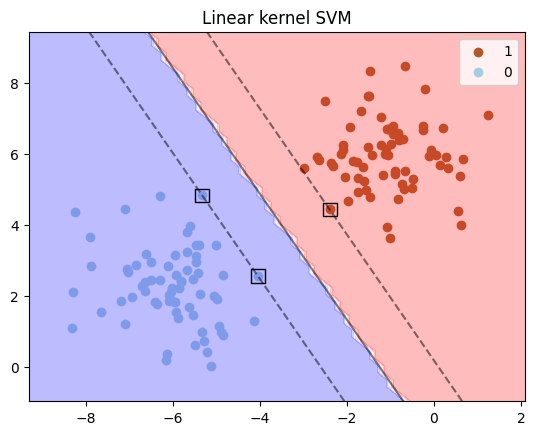

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# build the model
model = svm.SVC(kernel='linear', random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('Linear kernel SVM')
plt.show()

Train a radial basis function (RBF) SVM classifier with `gamma=0.5` and plot the results in the same way.

In [21]:
# data generation: not linearly separable
X, Y = make_circles(n_samples=200, noise=0.05, random_state=1234)
X = pd.DataFrame(X, columns=['x1', 'x2'])

# splitting data into training and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=333)

# We do this simply by changing the 'kernel' argument to rbf instead of linear, and adding the gamma argument

C:\Users\20202310\AppData\Local\Temp\ipykernel_25944\2746719258.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Paired')
C:\Users\20202310\PycharmProjects\FUCKJUPYTER\8DM50_Group_1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\20202310\PycharmProjects\FUCKJUPYTER\8DM50_Group_1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


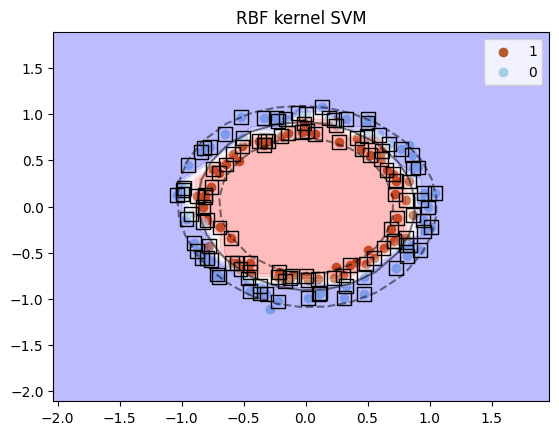

In [25]:
# build the model with RBF kernel
model = svm.SVC(kernel='rbf',gamma=0.5, random_state=33)
model.fit(X_train, Y_train)

# create plot
fig, ax = plt.subplots()

# get colors from qualitative colormap 'Paired'
cmap = plt.cm.get_cmap('Paired')

# plot data points
ax.scatter(X_train.iloc[Y_train == 1, 0], X_train.iloc[Y_train == 1, 1],
           c=[cmap(11)], label='1')
ax.scatter(X_train.iloc[Y_train == 0, 0], X_train.iloc[Y_train == 0, 1],
           c=[cmap(0)], label='0')
ax.legend(loc='best')

# plot the decision function
# create grid to evaluate model
x1_min, x1_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
x2_min, x2_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1

XX, YY = np.meshgrid(np.arange(x1_min, x1_max, .2),
                     np.arange(x2_min, x2_max, .2))

xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Establish the class for each point in the contour
Z = model.predict(xy).reshape(XX.shape)

# Visualization of the contour
ax.contourf(XX, YY, Z, cmap='bwr', alpha=0.3)

# plot support vectors, whose are responsible for building the margins
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k', marker='s')

ax.axis([x1_min, x1_max, x2_min, x2_max])
plt.axis('tight')
plt.title('RBF kernel SVM')
plt.show()


<p><font color='#770a0a'>When should a RBF kernel be used over a linear kernel? Motivate your answer.</font></p>

In the case that the data is structured in a way where no linear decision boundary exists, it could be beneficial to use a radial basis function kernel.


<p><font color='#770a0a'>Do we need to normalize the data before using a kernel function? Motivate your answer.
</font></p>

It is very much advised to normalize data before using a kernel function. This is because a kernel function takes into account the distance between different datapoints to determine its hyperplane. Making sure all variables are on the same scale ensures that no variable is lost due to it being too small of value compared to another variable.

## Predicting drug response on cell lines from gene expression data with SVMs

In [40]:
total_set = gene_expression.copy()
total_set['YM155'] = drug_response['YM155']
# Compute the z-scores
z_scores = (total_set - total_set.mean()) / total_set.std()

drug_response_bin = z_scores['YM155'].apply(lambda x: 0 if x < 0 else 1)
print(drug_response_bin)

949176     1
749714     0
749709     0
1660034    1
1240123    1
          ..
905946     1
1298157    0
909761     0
1298168    0
905957     1
Name: YM155, Length: 148, dtype: int64



Explore the hyper-parameter space of an SVM classifier with cross-validation for the Genomics of Drug Sensitivity in Cancer (GDSC) dataset. The`GridSearchCV` function can be used to specify a grid of parameter values with the `param_grid` parameter.

In [48]:
X_train, X_test, y_train, y_test = train_test_split(gene_expression, drug_response_bin, test_size=0.2, random_state=1)

In [42]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Assume X is the gene expression data and y is the drug response labels
# Replace with actual data loading step

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM classifier
model = svm.SVC()

# Define the hyper-parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient
    'kernel': ['rbf', 'linear']  # Kernels to explore
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the model on the training data
grid_search.fit(X_train, y_train)

# Best parameters found
print("Best Parameters:", grid_search.best_params_)

# Evaluate the best model on the test data
y_pred = grid_search.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best Parameters: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        19
           1       0.45      0.45      0.45        11

    accuracy                           0.60        30
   macro avg       0.57      0.57      0.57        30
weighted avg       0.60      0.60      0.60        30




Calculate the precision of your predictions, and compare your calculations with the results of `classification_report`, which displays many classification metrics.

Wat de neuk waren deze classification metrics hahaha



## Random forests

Follow the same steps as for SVM. Compare the two algorithms and report which one has better performance.

In [49]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score  # Import accuracy_score here

# 1. Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# 2. Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# 3. Set up GridSearchCV
grid_search = GridSearchCV(rf_model, param_grid, cv=5, n_jobs=-1)

# 4. Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

# 5. Get the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Score: {grid_search.best_score_}")

# 6. Use the best model for prediction
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the performance of the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Best Random Forest Model: {accuracy:.2f}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-validation Score: 0.6090579710144928
Accuracy of the Best Random Forest Model: 0.70



The random forests classifiers allows to perform feature selection. Evaluate the importance of features extracting the top 50 informative features. A bar plot (`plt.bar()`) can be a useful tool to visualize this. 

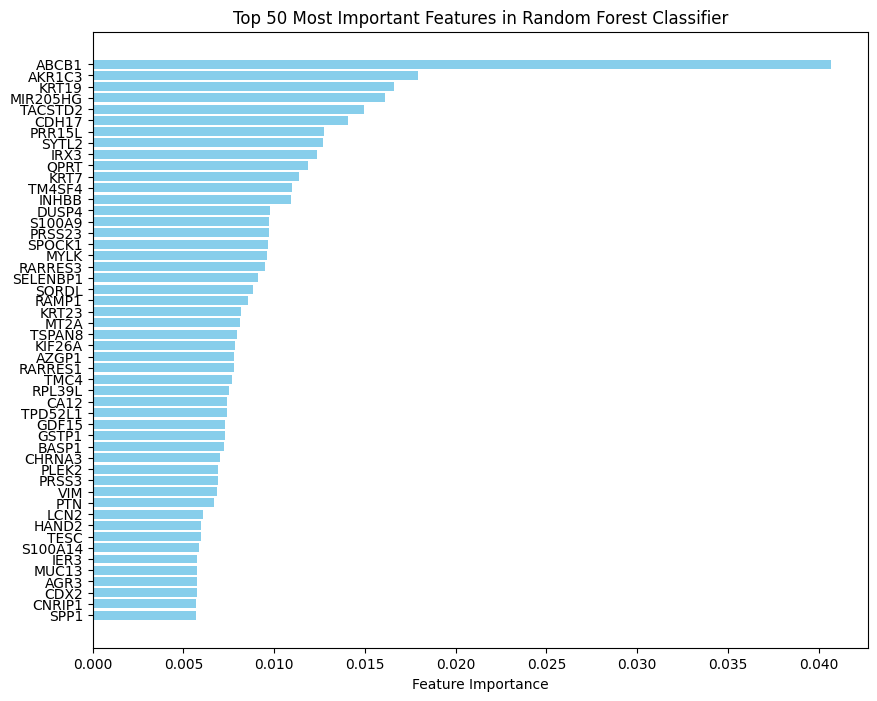

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Train a Random Forest model (you can use best_rf_model if you already have a trained model)
best_rf_model = grid_search.best_estimator_

# 1. Extract feature importances
feature_importances = best_rf_model.feature_importances_

# 2. Get the indices of the top 50 features
top_50_idx = np.argsort(feature_importances)[::-1][:50]  # Get indices of top 50 important features

# 3. Get the names of the features (Assuming you have a dataframe `X_train` with column names)
top_50_features = X_train.columns[top_50_idx]

# 4. Get the importance values for the top 50 features
top_50_importances = feature_importances[top_50_idx]

# 5. Create a bar plot to visualize the feature importance
plt.figure(figsize=(10, 8))
plt.barh(top_50_features, top_50_importances, color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 50 Most Important Features in Random Forest Classifier')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


It seems that one feature is MUCH more important in the classification compared to the other features.



## Biomedical applications


Driven by technological advances, there has recently been a dramatic increase in availability of biomedical data. Machine learning approaches are well suited to take advantage of this data and have been widely applied to many areas of biology. 

Example of these applications are genome annotation, biomarker identification, systems biology, genome data analysis, protein  function  prediction, protein  structure prediction, protein localization prediction, identification of protein interactions and drug discovery.

SVM and RF methods are among the most popular machine learning methods applied in bioinformatics or computational biology.

Perform a literature search and find a biomedical study in which SVM or RF is applied to obtain certain insights. <p><font color='#770a0a'>Explain the motivation behind using that specific algorithm in the study.
</font></p>

Yu, W., Liu, T., Valdez, R., Gwinn, M., & Khoury, M. J. (2010). Application of support vector machine modeling for prediction of common diseases: the case of diabetes and pre-diabetes. BMC Medical Informatics And Decision Making, 10(1). https://doi.org/10.1186/1472-6947-10-16

This study investigates the viability of support vector machine modeling in the prediction common disease; in this case diabetes. It describes that the use of a SVM could be superior to other classification methods such as logistic regression due to the fact that it is model-free. What this means is that the classification of a new datapoint happens through the use of a hyperplane that exists directly in the dataspace, and thus does not use a logistic curve etc. Furthermore, it is believed SVM is more reliable when using multivariate data. Lastly, through its regulatory parameter that balances the amount of margin and erroneous classification allowed the risk of overfitting is very low.